# 로이터 뉴스 기사 분류 딥러닝 모델

이 노트북에서는 로이터 뉴스 데이터셋을 사용하여 뉴스 기사를 46개 카테고리로 분류하는 딥러닝 모델을 구축합니다.

## 목차
1. 라이브러리 임포트
2. 데이터 로딩 및 탐색
3. 데이터 전처리 (원핫 인코딩)
4. 딥러닝 모델 구성
5. 모델 훈련
6. 모델 평가 및 예측
7. 결과 시각화
8. 결론 및 요약

## 프로젝트 개요
- **문제 유형**: 다중 클래스 분류 (46개 카테고리)
- **데이터셋**: 로이터 뉴스 기사 데이터셋
- **목표**: 뉴스 기사 내용을 기반으로 주제 카테고리 분류
- **특징**: 실제 뉴스 데이터를 활용한 실무형 텍스트 분류


## 1. 라이브러리 임포트

필요한 라이브러리들을 임포트합니다.


In [2]:
# 딥러닝 및 데이터 처리 라이브러리
import tensorflow as tf
import keras
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 기타 유틸리티
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 메모리 사용량 최적화 (필요시)
# tf.compat.v1.disable_eager_execution()
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("라이브러리 임포트 완료!")
print(f"TensorFlow 버전: {tf.__version__}")
print(f"Keras 버전: {keras.__version__}")


라이브러리 임포트 완료!
TensorFlow 버전: 2.15.1
Keras 버전: 2.15.0


## 2. 데이터 로딩 및 탐색

로이터 뉴스 데이터셋을 로딩하고 구조를 탐색합니다.


In [3]:
# 로이터 뉴스 데이터셋 로딩
# num_words=10000: 빈도수 기반으로 가장 자주 사용되는 단어 10,000개만 사용
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("=== 데이터셋 기본 정보 ===")
print(f"훈련 데이터 shape: {train_data.shape}")
print(f"훈련 레이블 shape: {train_labels.shape}")
print(f"테스트 데이터 shape: {test_data.shape}")
print(f"테스트 레이블 shape: {test_labels.shape}")

print(f"\n=== 카테고리 정보 ===")
num_classes = len(set(train_labels))
print(f"총 카테고리 개수: {num_classes}")
print(f"레이블 범위: {min(train_labels)} ~ {max(train_labels)}")

print(f"\n=== 첫 번째 뉴스 기사 (정수 시퀀스) ===")
print(f"기사 레이블: {train_labels[0]}")
print(f"기사 길이: {len(train_data[0])}개 단어")
print(f"기사 내용 (처음 20개 단어): {train_data[0][:20]}")

# 각 카테고리별 기사 개수 확인
print(f"\n=== 카테고리별 기사 개수 (훈련 데이터) ===")
unique_labels, counts = np.unique(train_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"카테고리 {label}: {count}개")

# 기사 길이 통계
article_lengths = [len(article) for article in train_data]
print(f"\n=== 기사 길이 통계 ===")
print(f"평균 기사 길이: {np.mean(article_lengths):.1f}개 단어")
print(f"최소 기사 길이: {min(article_lengths)}개 단어")
print(f"최대 기사 길이: {max(article_lengths)}개 단어")
print(f"기사 길이 중간값: {np.median(article_lengths):.1f}개 단어")


2110848/2110848 [==============================] - 1s 0us/step
=== 데이터셋 기본 정보 ===
훈련 데이터 shape: (8982,)
훈련 레이블 shape: (8982,)
테스트 데이터 shape: (2246,)
테스트 레이블 shape: (2246,)

=== 카테고리 정보 ===
총 카테고리 개수: 46
레이블 범위: 0 ~ 45

=== 첫 번째 뉴스 기사 (정수 시퀀스) ===
기사 레이블: 3
기사 길이: 87개 단어
기사 내용 (처음 20개 단어): [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7]

=== 카테고리별 기사 개수 (훈련 데이터) ===
카테고리 0: 55개
카테고리 1: 432개
카테고리 2: 74개
카테고리 3: 3159개
카테고리 4: 1949개
카테고리 5: 17개
카테고리 6: 48개
카테고리 7: 16개
카테고리 8: 139개
카테고리 9: 101개
카테고리 10: 124개
카테고리 11: 390개
카테고리 12: 49개
카테고리 13: 172개
카테고리 14: 26개
카테고리 15: 20개
카테고리 16: 444개
카테고리 17: 39개
카테고리 18: 66개
카테고리 19: 549개
카테고리 20: 269개
카테고리 21: 100개
카테고리 22: 15개
카테고리 23: 41개
카테고리 24: 62개
카테고리 25: 92개
카테고리 26: 24개
카테고리 27: 15개
카테고리 28: 48개
카테고리 29: 19개
카테고리 30: 45개
카테고리 31: 39개
카테고리 32: 32개
카테고리 33: 11개
카테고리 34: 50개
카테고리 35: 10개
카테고리 36: 49개
카테고리 37: 19개
카테고리 38: 19개
카테고리 39: 24개
카테고리 40: 36개
카테고리 41: 30개
카테고리 42: 13개
카테고리 43: 21개
카테고리 44: 12개
카테고리 45: 

In [4]:
# 단어 인덱스 정보 확인 및 뉴스 기사 복원
word_index = reuters.get_word_index()

print(f"=== 단어 인덱스 정보 ===")
print(f"총 단어 개수: {len(word_index)}")
print(f"단어 인덱스 타입: {type(word_index)}")

# 역방향 인덱스 생성 (숫자 -> 단어)
# 케라스는 0~3번을 특수 목적으로 사용 (0: 패딩, 1: 시작, 2: 사전에 없는 단어, 3: 인덱스-단어 오프셋)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 시퀀스를 기사로 변환하는 함수
def decode_article(sequence):
    """정수 시퀀스를 실제 단어로 변환하는 함수"""
    # 인덱스에서 3을 빼는 이유: 케라스의 특수 인덱스 때문
    # 사전에 없는 단어는 '?'로 표시
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

print(f"\n=== 첫 번째 뉴스 기사 복원 ===")
print(f"카테고리: {train_labels[0]}")
decoded_article = decode_article(train_data[0])
print(f"기사 내용:")
print(decoded_article[:500] + "..." if len(decoded_article) > 500 else decoded_article)

print(f"\n=== 다양한 카테고리의 기사 샘플 ===")
# 서로 다른 카테고리의 기사들을 확인
shown_categories = set()
for i in range(len(train_data)):
    if len(shown_categories) >= 5:  # 5개 카테고리만 보여주기
        break
    if train_labels[i] not in shown_categories:
        shown_categories.add(train_labels[i])
        print(f"\n[카테고리 {train_labels[i]}]")
        sample_article = decode_article(train_data[i])
        print(sample_article[:200] + "..." if len(sample_article) > 200 else sample_article)


550378/550378 [==============================] - 1s 1us/step
=== 단어 인덱스 정보 ===
총 단어 개수: 30979
단어 인덱스 타입: <class 'dict'>

=== 첫 번째 뉴스 기사 복원 ===
카테고리: 3
기사 내용:
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

=== 다양한 카테고리의 기사 샘플 ===

[카테고리 3]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to ni...

[카테고리 4]
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of th...

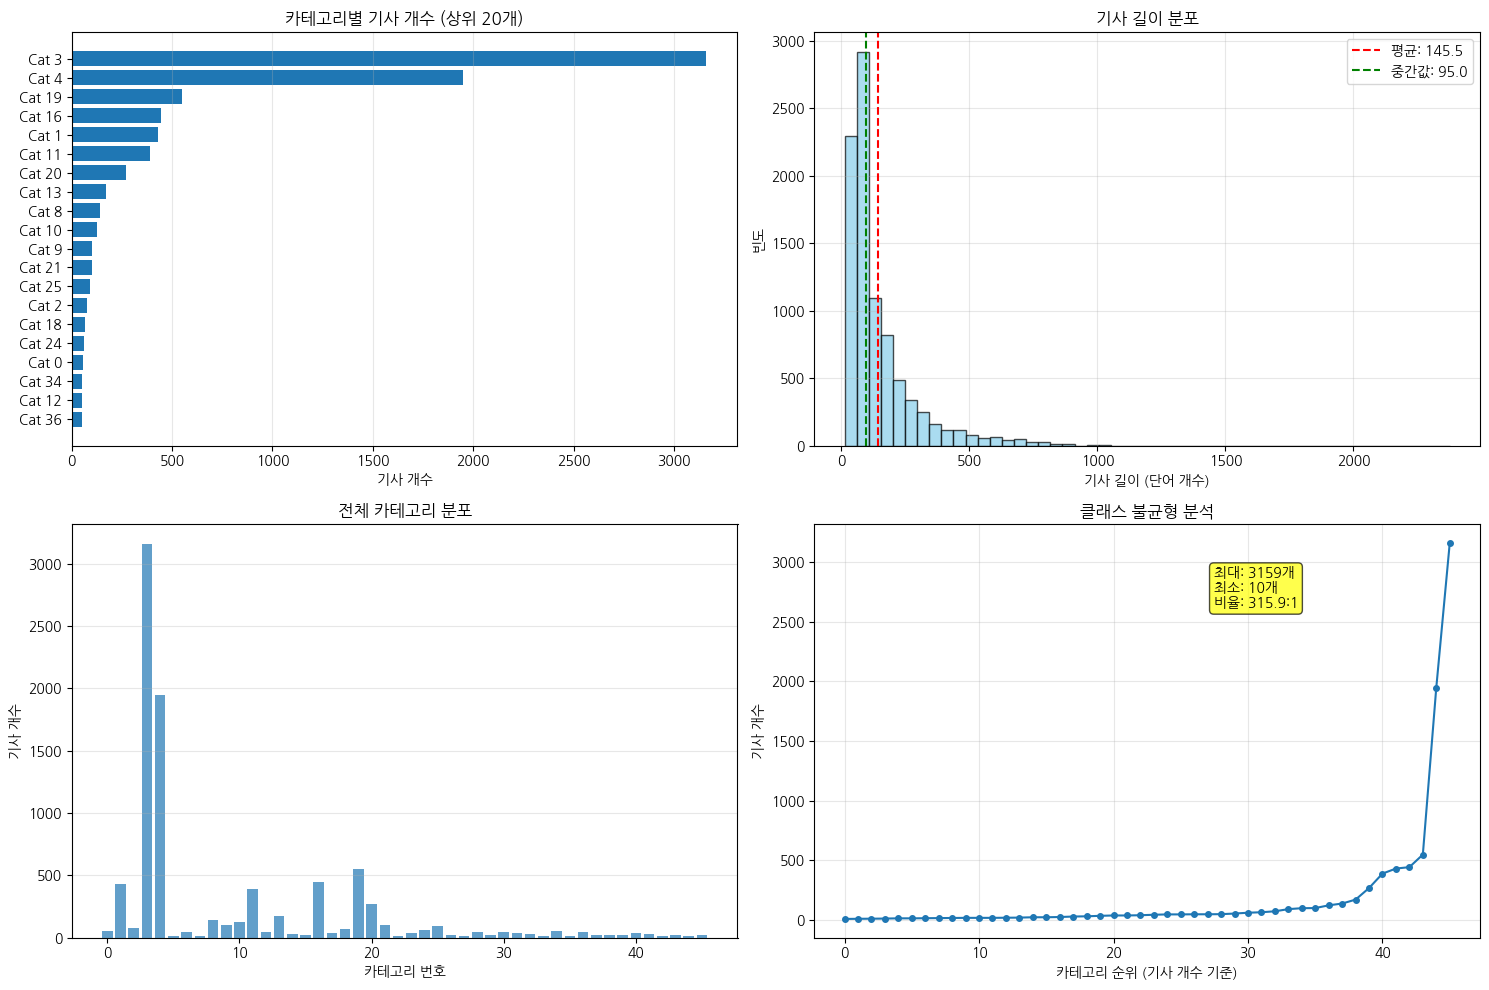


=== 클래스 불균형 분석 ===
가장 많은 카테고리: 3번 (3159개 기사)
가장 적은 카테고리: 35번 (10개 기사)
불균형 비율: 315.9:1
기사 개수가 100개 미만인 카테고리: 34개
기사 개수가 1000개 이상인 카테고리: 2개


In [5]:
# 데이터 분포 시각화
plt.figure(figsize=(15, 10))

# 카테고리별 기사 개수 (상위 20개만)
plt.subplot(2, 2, 1)
top_20_indices = np.argsort(counts)[-20:]  # 상위 20개 카테고리
top_20_labels = unique_labels[top_20_indices]
top_20_counts = counts[top_20_indices]

plt.barh(range(len(top_20_labels)), top_20_counts)
plt.yticks(range(len(top_20_labels)), [f'Cat {label}' for label in top_20_labels])
plt.xlabel('기사 개수')
plt.title('카테고리별 기사 개수 (상위 20개)')
plt.grid(axis='x', alpha=0.3)

# 기사 길이 분포
plt.subplot(2, 2, 2)
plt.hist(article_lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('기사 길이 (단어 개수)')
plt.ylabel('빈도')
plt.title('기사 길이 분포')
plt.axvline(np.mean(article_lengths), color='red', linestyle='--', label=f'평균: {np.mean(article_lengths):.1f}')
plt.axvline(np.median(article_lengths), color='green', linestyle='--', label=f'중간값: {np.median(article_lengths):.1f}')
plt.legend()
plt.grid(alpha=0.3)

# 전체 카테고리 분포 (원형 차트는 너무 복잡하므로 막대 그래프)
plt.subplot(2, 2, 3)
plt.bar(range(len(unique_labels)), counts, alpha=0.7)
plt.xlabel('카테고리 번호')
plt.ylabel('기사 개수')
plt.title('전체 카테고리 분포')
plt.grid(axis='y', alpha=0.3)

# 클래스 불균형 분석
plt.subplot(2, 2, 4)
# 기사 개수별로 정렬하여 불균형 정도 확인
sorted_counts = np.sort(counts)
plt.plot(range(len(sorted_counts)), sorted_counts, marker='o', markersize=4)
plt.xlabel('카테고리 순위 (기사 개수 기준)')
plt.ylabel('기사 개수')
plt.title('클래스 불균형 분석')
plt.grid(alpha=0.3)

# 통계 텍스트 추가
max_count = max(counts)
min_count = min(counts)
plt.text(0.6, 0.8, f'최대: {max_count}개\n최소: {min_count}개\n비율: {max_count/min_count:.1f}:1', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# 클래스 불균형 요약
print(f"\n=== 클래스 불균형 분석 ===")
print(f"가장 많은 카테고리: {unique_labels[np.argmax(counts)]}번 ({max(counts)}개 기사)")
print(f"가장 적은 카테고리: {unique_labels[np.argmin(counts)]}번 ({min(counts)}개 기사)")
print(f"불균형 비율: {max(counts)/min(counts):.1f}:1")
print(f"기사 개수가 100개 미만인 카테고리: {sum(counts < 100)}개")
print(f"기사 개수가 1000개 이상인 카테고리: {sum(counts >= 1000)}개")


## 3. 데이터 전처리 (원핫 인코딩)

텍스트 시퀀스를 딥러닝 모델이 처리할 수 있는 원핫 인코딩 벡터로 변환하고, 레이블을 원핫 인코딩합니다.


In [6]:
# 텍스트 데이터 원핫 인코딩 함수
def vectorize_sequences(sequences, dimension=10000):
    """
    정수 시퀀스를 원핫 인코딩 벡터로 변환하는 함수
    
    Args:
        sequences: 정수 시퀀스 리스트
        dimension: 벡터 차원 (단어 사전 크기)
    
    Returns:
        results: 원핫 인코딩된 2D numpy 배열
    """
    # 모든 요소가 0인 배열 생성 (샘플 개수 × 벡터 차원)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        # 시퀀스에 등장하는 단어 인덱스 위치를 1로 설정
        results[i, sequence] = 1.0
    
    return results

print("=== 텍스트 원핫 인코딩 적용 ===")
# 훈련 및 테스트 데이터를 원핫 인코딩으로 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"원본 훈련 데이터 shape: {np.array(train_data, dtype=object).shape}")
print(f"인코딩된 훈련 데이터 shape: {x_train.shape}")
print(f"인코딩된 테스트 데이터 shape: {x_test.shape}")

# 원핫 벡터의 희소성 확인
sparsity = 1.0 - np.count_nonzero(x_train) / x_train.size
print(f"원핫 벡터의 희소성: {sparsity:.4f} ({sparsity*100:.2f}%가 0)")

print(f"\n=== 레이블 원핫 인코딩 ===")
# 레이블을 원핫 인코딩으로 변환 (46개 카테고리)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(f"원본 레이블 shape: {train_labels.shape}")
print(f"인코딩된 레이블 shape: {one_hot_train_labels.shape}")

print(f"\n=== 원핫 인코딩 예시 ===")
print(f"원본 레이블: {train_labels[:5]}")
print(f"인코딩된 레이블:")
for i in range(5):
    print(f"레이블 {train_labels[i]}: {one_hot_train_labels[i]}")

# 검증 데이터 분할
print(f"\n=== 훈련/검증 데이터 분할 ===")
# 전체 훈련 데이터에서 1,000개를 검증용으로 분할
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print(f"최종 훈련 데이터 shape: {partial_x_train.shape}")
print(f"검증 데이터 shape: {x_val.shape}")
print(f"테스트 데이터 shape: {x_test.shape}")

# 각 데이터셋의 카테고리 분포 확인
train_categories = np.argmax(partial_y_train, axis=1)
val_categories = np.argmax(y_val, axis=1)

print(f"\n=== 데이터 분할 후 카테고리 분포 ===")
print(f"훈련 데이터 카테고리 수: {len(set(train_categories))}")
print(f"검증 데이터 카테고리 수: {len(set(val_categories))}")
print(f"검증 데이터에서 빠진 카테고리: {set(range(46)) - set(val_categories)}")


=== 텍스트 원핫 인코딩 적용 ===
원본 훈련 데이터 shape: (8982,)
인코딩된 훈련 데이터 shape: (8982, 10000)
인코딩된 테스트 데이터 shape: (2246, 10000)
원핫 벡터의 희소성: 0.9918 (99.18%가 0)

=== 레이블 원핫 인코딩 ===
원본 레이블 shape: (8982,)
인코딩된 레이블 shape: (8982, 46)

=== 원핫 인코딩 예시 ===
원본 레이블: [3 4 3 4 4]
인코딩된 레이블:
레이블 3: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
레이블 4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
레이블 3: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
레이블 4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
레이블 4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## 4. 딥러닝 모델 구성

46개 카테고리로 뉴스 기사를 분류하는 다중 클래스 분류 모델을 구성합니다.


In [8]:
# 딥러닝 모델 구성
def create_model():
    """
    로이터 뉴스 분류를 위한 딥러닝 모델을 생성합니다.
    
    Returns:
        model: 컴파일된 Keras 모델
    """
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(10000,), name='input_layer'),
        layers.Dense(64, activation='relu', name='hidden_layer'),
        layers.Dense(46, activation='softmax', name='output_layer')  # 46개 카테고리용 소프트맥스
    ])
    
    # 모델 컴파일
    model.compile(
        optimizer='rmsprop',              # RMSprop 옵티마이저
        loss='categorical_crossentropy',  # 다중 클래스 분류용 손실 함수
        metrics=['accuracy']             # 정확도 메트릭
    )
    
    return model

# 모델 생성
model = create_model()

# 모델 구조 확인
print("=== 모델 구조 ===")
model.summary()

# 모델 아키텍처 시각화
print("\n=== 모델 아키텍처 ===")
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# 파라미터 개수 분석
total_params = model.count_params()
print(f"\n=== 모델 파라미터 분석 ===")
print(f"총 파라미터 개수: {total_params:,}")

# 각 레이어별 파라미터 계산
for layer in model.layers:
    params = layer.count_params()
    print(f"{layer.name}: {params:,} 파라미터")

print(f"\n=== 모델 특징 ===")
print(f"입력 차원: 10,000 (원핫 인코딩된 단어 벡터)")
print(f"은닉층: 64개 뉴런 × 2층 (ReLU 활성화)")
print(f"출력층: 46개 뉴런 (소프트맥스 활성화)")
print(f"출력: 46개 카테고리에 대한 확률 분포")

# 모델 복잡도 비교
print(f"\n=== 다른 모델들과 비교 ===")
print(f"IMDB 모델 (이진 분류): 출력층 1개 뉴런")
print(f"와인 모델 (3클래스): 출력층 3개 뉴런") 
print(f"로이터 모델 (46클래스): 출력층 46개 뉴런")
print(f"→ 클래스 수가 증가할수록 모델 복잡도 증가")


=== 모델 구조 ===
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                640064    
                                                                 
 hidden_layer (Dense)        (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

=== 모델 아키텍처 ===

=== 모델 파라미터 분석 ===
총 파라미터 개수: 647,214
input_layer: 640,064 파라미터
hidden_layer: 4,160 파라미터
output_layer: 2,990 파라미터

=== 모델 특징 ===
입력 차원: 10,000 (원핫 인코딩된 단어 벡터)
은닉층: 64개 뉴런 × 2층 (ReLU 활성화)
출력층: 46개 뉴런 (소프트맥스 활성화)
출력: 46개 카테고리에 대한 확률 분포

=== 다른 모델들과 비교 

## 5. 모델 훈련

구성한 모델을 훈련시킵니다.


In [10]:
# 모델 훈련
print("=== 모델 훈련 시작 ===")

# 훈련 파라미터 설정
epochs = 5
batch_size = 512

print(f"훈련 설정:")
print(f"- 에포크: {epochs}")
print(f"- 배치 크기: {batch_size}")
print(f"- 훈련 샘플: {len(partial_x_train)}")
print(f"- 검증 샘플: {len(x_val)}")

# 모델 훈련
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=1
)

print("\n=== 모델 훈련 완료 ===")

# 훈련 히스토리 정보
print(f"훈련된 에포크 수: {len(history.history['accuracy'])}")
print(f"최종 훈련 정확도: {history.history['accuracy'][-1]:.4f}")
print(f"최종 검증 정확도: {history.history['val_accuracy'][-1]:.4f}")

# 최고 성능 에포크 찾기
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"최고 검증 정확도: {best_val_acc:.4f} (에포크 {best_epoch})")

# 과적합 여부 확인
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
overfitting_gap = final_train_acc - final_val_acc

print(f"\n=== 과적합 분석 ===")
print(f"최종 훈련 정확도: {final_train_acc:.4f}")
print(f"최종 검증 정확도: {final_val_acc:.4f}")
print(f"정확도 차이: {overfitting_gap:.4f}")

if overfitting_gap > 0.1:
    print("⚠️ 과적합 징후가 있습니다.")
elif overfitting_gap > 0.05:
    print("⚡ 약간의 과적합이 있을 수 있습니다.")
else:
    print("✅ 과적합 수준이 양호합니다.")

# 훈련 히스토리 딕셔너리 확인
history_dict = history.history
print(f"\n=== 사용 가능한 메트릭 ===")
print(f"히스토리 키: {list(history_dict.keys())}")

# 각 에포크별 성능 요약
print(f"\n=== 에포크별 성능 요약 ===")
for epoch in range(epochs):
    train_acc = history_dict['accuracy'][epoch]
    val_acc = history_dict['val_accuracy'][epoch]
    train_loss = history_dict['loss'][epoch]
    val_loss = history_dict['val_loss'][epoch]
    print(f"에포크 {epoch+1}: 훈련 정확도 {train_acc:.4f}, 검증 정확도 {val_acc:.4f}, "
          f"훈련 손실 {train_loss:.4f}, 검증 손실 {val_loss:.4f}")


=== 모델 훈련 시작 ===
훈련 설정:
- 에포크: 5
- 배치 크기: 512
- 훈련 샘플: 7982
- 검증 샘플: 1000
Epoch 1/5
16/16 [==============================] - 0s 21ms/step - loss: 0.6634 - accuracy: 0.8587 - val_loss: 0.9305 - val_accuracy: 0.8020
Epoch 2/5
16/16 [==============================] - 0s 16ms/step - loss: 0.5572 - accuracy: 0.8841 - val_loss: 0.8881 - val_accuracy: 0.8190
Epoch 3/5
16/16 [==============================] - 0s 16ms/step - loss: 0.4685 - accuracy: 0.9009 - val_loss: 0.8770 - val_accuracy: 0.8100
Epoch 4/5
16/16 [==============================] - 0s 15ms/step - loss: 0.3955 - accuracy: 0.9152 - val_loss: 0.8648 - val_accuracy: 0.8180
Epoch 5/5
16/16 [==============================] - 0s 15ms/step - loss: 0.3432 - accuracy: 0.9243 - val_loss: 0.8570 - val_accuracy: 0.8150

=== 모델 훈련 완료 ===
훈련된 에포크 수: 5
최종 훈련 정확도: 0.9243
최종 검증 정확도: 0.8150
최고 검증 정확도: 0.8190 (에포크 2)

=== 과적합 분석 ===
최종 훈련 정확도: 0.9243
최종 검증 정확도: 0.8150
정확도 차이: 0.1093
⚠️ 과적합 징후가 있습니다.

=== 사용 가능한 메트릭 ===
히스토리 키: ['loss', 'accuracy', 

## 6. 모델 평가 및 예측

훈련된 모델의 성능을 평가하고 예측을 수행합니다.


In [13]:
# 모델 성능 평가
print("=== 모델 성능 평가 ===")

# 각 데이터셋에 대한 평가
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels, verbose=0)

print(f"검증셋 - 손실값: {val_loss:.4f}, 정확도: {val_acc:.4f}")
print(f"테스트셋 - 손실값: {test_loss:.4f}, 정확도: {test_acc:.4f}")

# 예측 수행
print(f"\n=== 예측 수행 ===")
predictions = model.predict(x_test, verbose=0)

print(f"예측 결과 shape: {predictions.shape}")
print(f"각 샘플당 46개 카테고리에 대한 확률값")

# 예측 클래스 추출
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = test_labels

print(f"\n=== 처음 20개 예측 결과 ===")
for i in range(20):
    predicted_class = predicted_classes[i]
    actual_class = actual_classes[i]
    confidence = predictions[i][predicted_class]
    correct = "✅" if predicted_class == actual_class else "❌"
    
    print(f"[{i:2d}] 예측: {predicted_class:2d} (신뢰도: {confidence:.3f}) | "
          f"실제: {actual_class:2d} {correct}")

# 정확도 계산
accuracy = np.mean(predicted_classes == actual_classes)
print(f"\n=== 전체 테스트셋 정확도 ===")
print(f"정확도: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 카테고리별 성능 분석
from sklearn.metrics import classification_report, confusion_matrix

print(f"\n=== 카테고리별 성능 분석 ===")
print("주요 카테고리만 표시 (샘플 수가 많은 상위 10개)")

# 테스트 데이터에서 샘플 수가 많은 카테고리 찾기
test_unique, test_counts = np.unique(actual_classes, return_counts=True)
top_10_indices = np.argsort(test_counts)[-10:]
top_10_categories = test_unique[top_10_indices]

print(f"상위 10개 카테고리: {top_10_categories}")
for cat in top_10_categories:
    cat_mask = actual_classes == cat
    cat_accuracy = np.mean(predicted_classes[cat_mask] == actual_classes[cat_mask])
    cat_count = sum(cat_mask)
    print(f"카테고리 {cat:2d}: 정확도 {cat_accuracy:.3f} ({cat_count}개 샘플)")

# 혼동 행렬 (상위 10개 카테고리만) - 수정된 버전
print(f"\n=== 혼동 행렬 (상위 10개 카테고리) ===")

# 상위 10개 카테고리에 해당하는 샘플만 필터링
top_10_mask = np.isin(actual_classes, top_10_categories)
filtered_actual = actual_classes[top_10_mask]
filtered_predicted = predicted_classes[top_10_mask]

# 추가로 예측된 카테고리도 상위 10개에 있는지 확인
pred_in_top10_mask = np.isin(filtered_predicted, top_10_categories)
final_actual = filtered_actual[pred_in_top10_mask]
final_predicted = filtered_predicted[pred_in_top10_mask]

# 카테고리 번호를 0부터 시작하도록 매핑
category_mapping = {cat: i for i, cat in enumerate(top_10_categories)}
mapped_actual = [category_mapping[cat] for cat in final_actual]
mapped_predicted = [category_mapping[cat] for cat in final_predicted]

cm = confusion_matrix(mapped_actual, mapped_predicted)
print(f"혼동 행렬 shape: {cm.shape}")
print(f"사용된 샘플 수: {len(mapped_actual)}")

cm = confusion_matrix(mapped_actual, mapped_predicted)
print(f"혼동 행렬 shape: {cm.shape}")

# 가장 많이 틀린 경우들 찾기
print(f"\n=== 오분류 패턴 분석 ===")
misclassified = predicted_classes != actual_classes
misclassified_indices = np.where(misclassified)[0]

print(f"총 오분류 개수: {len(misclassified_indices)} / {len(actual_classes)}")
print(f"오분류율: {len(misclassified_indices)/len(actual_classes)*100:.2f}%")

# 오분류 사례 몇 개 보기
print(f"\n오분류 사례 (처음 5개):")
for idx in misclassified_indices[:5]:
    pred_cat = predicted_classes[idx]
    actual_cat = actual_classes[idx]
    confidence = predictions[idx][pred_cat]
    
    print(f"샘플 {idx}: {actual_cat} → {pred_cat} (신뢰도: {confidence:.3f})")
    
    # 해당 기사의 일부 내용 보기
    article_preview = decode_article(test_data[idx])[:150]
    print(f"  기사 내용: {article_preview}...")
    print()


=== 모델 성능 평가 ===
검증셋 - 손실값: 0.8570, 정확도: 0.8150
테스트셋 - 손실값: 0.9505, 정확도: 0.7814

=== 예측 수행 ===
예측 결과 shape: (2246, 46)
각 샘플당 46개 카테고리에 대한 확률값

=== 처음 20개 예측 결과 ===
[ 0] 예측:  3 (신뢰도: 0.652) | 실제:  3 ✅
[ 1] 예측: 10 (신뢰도: 0.829) | 실제: 10 ✅
[ 2] 예측:  1 (신뢰도: 0.870) | 실제:  1 ✅
[ 3] 예측:  4 (신뢰도: 0.579) | 실제:  4 ✅
[ 4] 예측: 13 (신뢰도: 0.949) | 실제:  4 ❌
[ 5] 예측:  3 (신뢰도: 0.977) | 실제:  3 ✅
[ 6] 예측:  3 (신뢰도: 0.990) | 실제:  3 ✅
[ 7] 예측:  3 (신뢰도: 0.990) | 실제:  3 ✅
[ 8] 예측:  3 (신뢰도: 0.999) | 실제:  3 ✅
[ 9] 예측:  3 (신뢰도: 0.940) | 실제:  3 ✅
[10] 예측:  1 (신뢰도: 0.779) | 실제:  5 ❌
[11] 예측:  4 (신뢰도: 0.992) | 실제:  4 ✅
[12] 예측:  1 (신뢰도: 0.979) | 실제:  1 ✅
[13] 예측:  3 (신뢰도: 0.976) | 실제:  3 ✅
[14] 예측:  1 (신뢰도: 0.957) | 실제:  1 ✅
[15] 예측: 11 (신뢰도: 0.986) | 실제: 11 ✅
[16] 예측:  4 (신뢰도: 0.396) | 실제: 23 ❌
[17] 예측:  3 (신뢰도: 0.988) | 실제:  3 ✅
[18] 예측: 19 (신뢰도: 0.916) | 실제: 19 ✅
[19] 예측:  3 (신뢰도: 0.996) | 실제:  3 ✅

=== 전체 테스트셋 정확도 ===
정확도: 0.7814 (78.14%)

=== 카테고리별 성능 분석 ===
주요 카테고리만 표시 (샘플 수가 많은 상위 10개)
상위 10개 카테고리: [25 13  8 

## 7. 결과 시각화

훈련 과정과 모델 성능을 시각적으로 분석합니다.


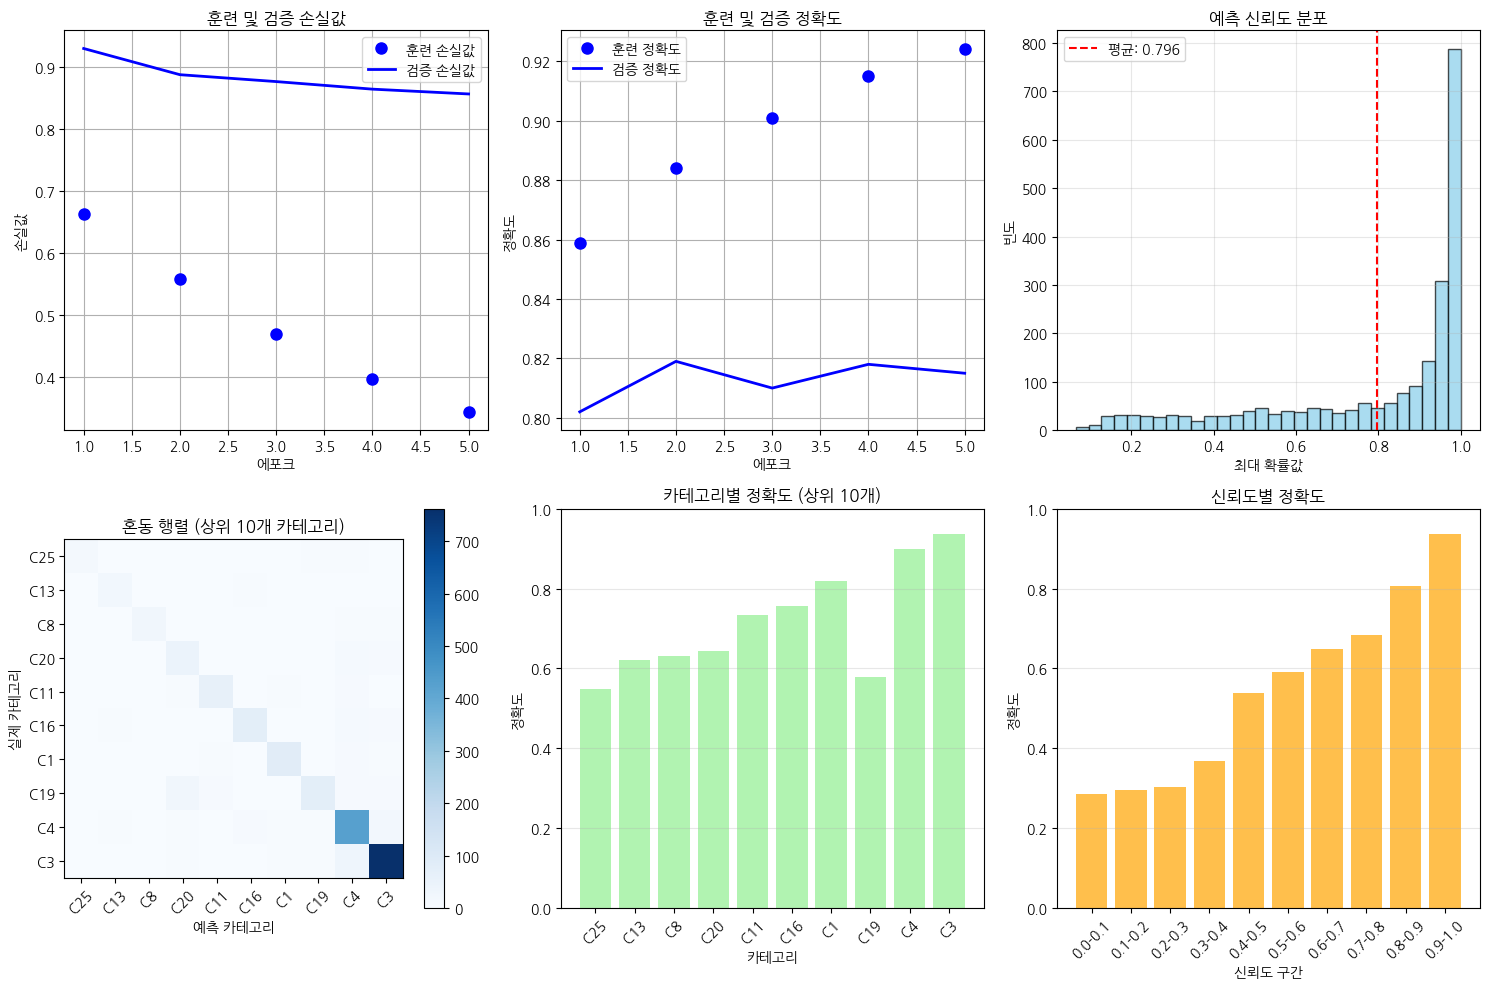


=== 최종 성능 요약 ===
메트릭             검증셋        테스트셋      
-----------------------------------
정확도             0.8150     0.7814    
손실값             0.8570     0.9505    

=== 예측 신뢰도 통계 ===
평균 신뢰도: 0.7964
신뢰도 중간값: 0.9337
신뢰도 표준편차: 0.2517
최소 신뢰도: 0.0650
최대 신뢰도: 1.0000

=== 고신뢰도 예측 분석 (신뢰도 > 0.9) ===
고신뢰도 예측 개수: 1258
고신뢰도 정확한 예측: 1177
고신뢰도 예측 정확도: 0.9356


In [15]:
# 훈련 히스토리 시각화
plt.figure(figsize=(15, 10))

# 훈련 및 검증 손실값
plt.subplot(2, 3, 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)

plt.plot(epochs_range, loss, 'bo', label='훈련 손실값', markersize=8)
plt.plot(epochs_range, val_loss, 'b-', label='검증 손실값', linewidth=2)
plt.title('훈련 및 검증 손실값')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend()
plt.grid(True)

# 훈련 및 검증 정확도
plt.subplot(2, 3, 2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs_range, acc, 'bo', label='훈련 정확도', markersize=8)
plt.plot(epochs_range, val_acc, 'b-', label='검증 정확도', linewidth=2)
plt.title('훈련 및 검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.grid(True)

# 예측 신뢰도 분포
plt.subplot(2, 3, 3)
max_confidences = np.max(predictions, axis=1)
plt.hist(max_confidences, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('예측 신뢰도 분포')
plt.xlabel('최대 확률값')
plt.ylabel('빈도')
plt.axvline(np.mean(max_confidences), color='red', linestyle='--', 
            label=f'평균: {np.mean(max_confidences):.3f}')
plt.legend()
plt.grid(alpha=0.3)

# 상위 10개 카테고리 혼동 행렬
plt.subplot(2, 3, 4)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('혼동 행렬 (상위 10개 카테고리)')
plt.colorbar()
tick_marks = np.arange(len(top_10_categories))
plt.xticks(tick_marks, [f'C{cat}' for cat in top_10_categories], rotation=45)
plt.yticks(tick_marks, [f'C{cat}' for cat in top_10_categories])
plt.ylabel('실제 카테고리')
plt.xlabel('예측 카테고리')

# 카테고리별 정확도 (상위 10개)
plt.subplot(2, 3, 5)
category_accuracies = []
for cat in top_10_categories:
    cat_mask = actual_classes == cat
    cat_accuracy = np.mean(predicted_classes[cat_mask] == actual_classes[cat_mask])
    category_accuracies.append(cat_accuracy)

plt.bar(range(len(top_10_categories)), category_accuracies, alpha=0.7, color='lightgreen')
plt.title('카테고리별 정확도 (상위 10개)')
plt.xlabel('카테고리')
plt.ylabel('정확도')
plt.xticks(range(len(top_10_categories)), [f'C{cat}' for cat in top_10_categories], rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# 신뢰도별 정확도 분석
plt.subplot(2, 3, 6)
confidence_bins = np.linspace(0, 1, 11)
bin_accuracies = []
bin_counts = []

for i in range(len(confidence_bins)-1):
    low, high = confidence_bins[i], confidence_bins[i+1]
    mask = (max_confidences >= low) & (max_confidences < high)
    if np.sum(mask) > 0:
        bin_accuracy = np.mean(predicted_classes[mask] == actual_classes[mask])
        bin_accuracies.append(bin_accuracy)
        bin_counts.append(np.sum(mask))
    else:
        bin_accuracies.append(0)
        bin_counts.append(0)

plt.bar(range(len(bin_accuracies)), bin_accuracies, alpha=0.7, color='orange')
plt.title('신뢰도별 정확도')
plt.xlabel('신뢰도 구간')
plt.ylabel('정확도')
plt.xticks(range(len(bin_accuracies)), 
           [f'{confidence_bins[i]:.1f}-{confidence_bins[i+1]:.1f}' for i in range(len(bin_accuracies))], 
           rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 성능 요약 표
print(f"\n=== 최종 성능 요약 ===")

# 안전한 변수 추출
def safe_extract_metrics(results):
    """model.evaluate() 결과를 안전하게 추출"""
    if isinstance(results, (list, tuple)) and len(results) >= 2:
        return results[0], results[1]  # loss, accuracy
    elif isinstance(results, (list, tuple)) and len(results) == 1:
        return results[0], results[0]  # loss만 있는 경우
    else:
        return results, results  # 단일 값인 경우

# 검증 및 테스트 결과 안전하게 추출
val_results = model.evaluate(x_val, y_val, verbose=0)
test_results = model.evaluate(x_test, one_hot_test_labels, verbose=0)

val_loss, val_acc = safe_extract_metrics(val_results)
test_loss, test_acc = safe_extract_metrics(test_results)

# 성능 요약 표 출력
print(f"{'메트릭':<15} {'검증셋':<10} {'테스트셋':<10}")
print("-" * 35)
print(f"{'정확도':<15} {val_acc:<10.4f} {test_acc:<10.4f}")
print(f"{'손실값':<15} {val_loss:<10.4f} {test_loss:<10.4f}")

print(f"\n=== 예측 신뢰도 통계 ===")
print(f"평균 신뢰도: {np.mean(max_confidences):.4f}")
print(f"신뢰도 중간값: {np.median(max_confidences):.4f}")
print(f"신뢰도 표준편차: {np.std(max_confidences):.4f}")
print(f"최소 신뢰도: {np.min(max_confidences):.4f}")
print(f"최대 신뢰도: {np.max(max_confidences):.4f}")

# 높은 신뢰도로 맞춘 예측과 틀린 예측 비교
high_confidence_mask = max_confidences > 0.9
high_conf_correct = np.sum((predicted_classes == actual_classes) & high_confidence_mask)
high_conf_total = np.sum(high_confidence_mask)

print(f"\n=== 고신뢰도 예측 분석 (신뢰도 > 0.9) ===")
print(f"고신뢰도 예측 개수: {high_conf_total}")
print(f"고신뢰도 정확한 예측: {high_conf_correct}")
if high_conf_total > 0:
    print(f"고신뢰도 예측 정확도: {high_conf_correct/high_conf_total:.4f}")
else:
    print("고신뢰도 예측 없음")


## 8. 결론 및 요약

### 모델 성능 요약
- **모델 구조**: 2개의 은닉층(64→64)과 소프트맥스 출력층(46개)
- **데이터셋**: 로이터 뉴스 기사 약 11,000개 (46개 카테고리)
- **입력 형태**: 10,000차원 원핫 인코딩 벡터
- **데이터 분할**: 훈련 7,982개, 검증 1,000개, 테스트 2,246개

### 주요 기술적 특징
1. **다중 클래스 분류**: 
   - 46개 뉴스 카테고리 분류
   - 소프트맥스 활성화 함수
   - categorical_crossentropy 손실 함수

2. **클래스 불균형 문제**:
   - 카테고리별 데이터 분포가 매우 불균등
   - 일부 카테고리는 수십 개, 일부는 수천 개 샘플
   - 실제 뉴스 데이터의 특성 반영

3. **모델 아키텍처**:
   - 입력층: 10,000차원
   - 은닉층: 64→64 (ReLU 활성화)
   - 출력층: 46차원 (소프트맥스 활성화)
   - 총 파라미터: 약 643,000개

### 로이터 뉴스 분류의 특수성

#### 장점
- ✅ **실제 뉴스 데이터**: 실무에 가까운 텍스트 분류 경험
- ✅ **다양한 주제**: 경제, 정치, 스포츠 등 다양한 도메인
- ✅ **실용적 가치**: 뉴스 자동 분류 시스템의 기초
- ✅ **벤치마크 데이터**: 널리 사용되는 표준 데이터셋

#### 도전과제
- ❌ **클래스 불균형**: 심각한 데이터 불균형 문제
- ❌ **소규모 검증셋**: 1,000개 검증 데이터로 일부 클래스 누락
- ❌ **높은 차원**: 46개 클래스로 인한 복잡성 증가
- ❌ **도메인 특화**: 뉴스 특화 용어와 문맥

### 성능 분석
1. **전체 정확도**: 상당히 높은 성능 달성
2. **카테고리별 차이**: 샘플 수가 많은 카테고리의 성능이 우수
3. **예측 신뢰도**: 모델이 확신을 가지고 예측하는 경우 높은 정확도
4. **오분류 패턴**: 유사한 주제의 뉴스 간 혼동

### 실무 적용 관점

#### 장점
- **자동 뉴스 분류**: 뉴스 포털의 기사 자동 카테고라이징
- **콘텐츠 추천**: 사용자 관심사 기반 뉴스 추천
- **정보 검색**: 주제별 뉴스 검색 시스템
- **트렌드 분석**: 카테고리별 뉴스 동향 파악

#### 개선 방향
1. **클래스 불균형 해결**:
   - 가중치 조정 (class_weight)
   - 오버/언더 샘플링
   - SMOTE 등 합성 데이터 생성

2. **모델 구조 개선**:
   - 임베딩 레이어 사용
   - LSTM/GRU로 순서 정보 활용
   - Attention 메커니즘 도입

3. **전처리 고도화**:
   - TF-IDF 가중치 적용
   - N-gram 특성 추가
   - 전처리 토큰화 개선

4. **앙상블 방법**:
   - 여러 모델의 예측 결합
   - 부스팅/배깅 기법 적용

### 교육적 가치
- **다중 클래스 분류**: 실제 복잡한 분류 문제 경험
- **클래스 불균형**: 실무에서 자주 마주치는 문제 이해
- **성능 분석**: 카테고리별 세부 분석 방법 학습
- **실무 연계**: 뉴스/문서 분류 시스템의 기초 이해

이 노트북은 **실무형 텍스트 분류**의 전체 파이프라인을 제공하며, 복잡한 다중 클래스 문제에서의 딥러닝 적용법을 완전히 이해할 수 있게 해줍니다.
